<a href="https://colab.research.google.com/github/carmeniturbe/sales-predictions/blob/main/Project_1_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning Steps

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filename = "/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/Proyectos Data Science/Project 1 - Sales Predictions/sales_predictions_2023.csv"

df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Cheking for number of rows and colums
df.shape

(8523, 12)

In [6]:
# Cheking for data types of rows and colums only
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Cheking for duplicates -- Count the duplicates
df.duplicated()
df.duplicated().sum()

0

In [8]:
# General overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# Examine the number of unique values in columns
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
# Identifying missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# We'll remove the Item Weight column because there is likely little or no correlation between the item's weight and its likelihood of being sold.
df = df.drop(columns=['Item_Weight'])
df.head()


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:

# Identifying missing values
df.isna().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Below we'll evaluation the relation between the missing values and the Item Outlet sales column to fill out the 2410 missing values avilable in the Outlet_Size column

In [13]:
#Calculating mean sales
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()


Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [14]:
#Calculating mean sales of missing values
mean_sales_for_missing_outlet_size = df.loc[df['Outlet_Size'].isnull(), 'Item_Outlet_Sales'].mean()
print(mean_sales_for_missing_outlet_size)

1822.6269474688797


In [15]:
#Calculating sales ranges
sales_range_by_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].apply(lambda x: x.max() - x.min())
print(sales_range_by_size)

Outlet_Size
High      10183.4110
Medium    13017.7216
Small      9745.9804
Name: Item_Outlet_Sales, dtype: float64


In [16]:
#Calculating sales range of missing valuess
range_for_missing_values = df.loc[df['Outlet_Size'].isnull(), 'Item_Outlet_Sales'].max() - df.loc[df['Outlet_Size'].isnull(), 'Item_Outlet_Sales'].min()
print("Range for missing values:", range_for_missing_values)

Range for missing values: 9631.4628


The mean of the missing values is similar to the mean of the small outlets. We confirmed this by calculating the range, which also returned a similar result. Based on these findings, we concluded that the best approach is to fill the missing values in the Outlet_Size column with the value 'Small'.

In [17]:
#Filling out missing values and verifying there aren't any other missing values.
df['Outlet_Size'].fillna('Small', inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
#Checking the types of outlets
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [20]:
#it makes sence to move all the supermarkets into the same category
df['Outlet_Type']= df['Outlet_Type'].replace(["Supermarket Type1","Supermarket Type2","Supermarket Type3"], "Supermarket")
df['Outlet_Type'].value_counts()

Supermarket      7440
Grocery Store    1083
Name: Outlet_Type, dtype: int64

In [21]:
# Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
# Standardize the values in the 'Item_Fat_Content' column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
# Summary stats of the Item_Outlet_Sales column
df['Item_Outlet_Sales'].describe().round(2)

count     8523.00
mean      2181.29
std       1706.50
min         33.29
25%        834.25
50%       1794.33
75%       3101.30
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

# Data Visualization

<ipython-input-24-df35434e4f4f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.0, 1.0, 'There is a moderate relationship between Outlet Sales and MRP for each Item')

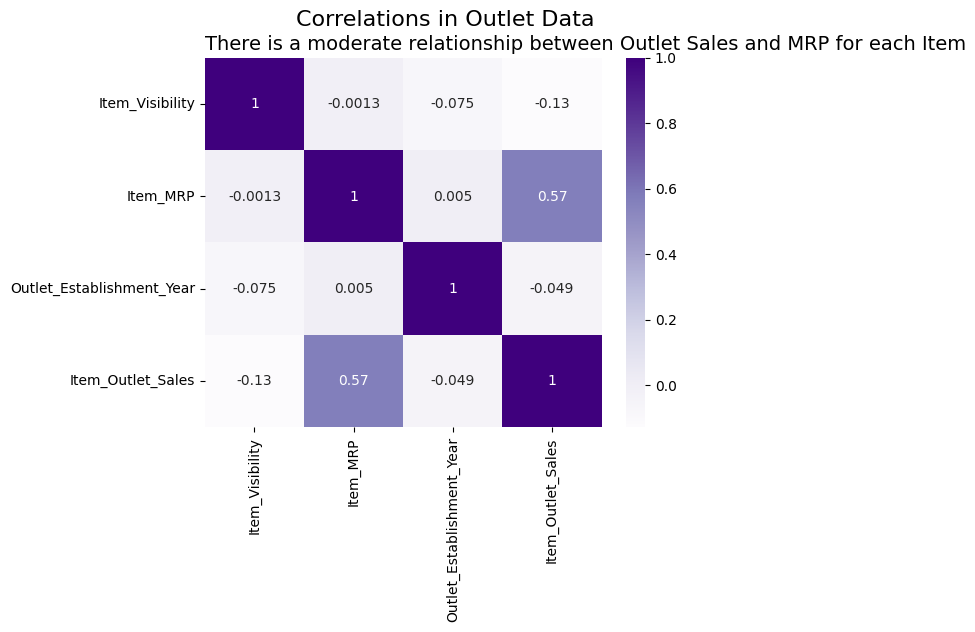

In [24]:
#heatmap first to indicate some relationships
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True)
plt.suptitle('Correlations in Outlet Data', fontsize = 16)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('There is a moderate relationship between Outlet Sales and MRP for each Item', loc = 'left', fontsize = 14)

(0.0, 800.0)

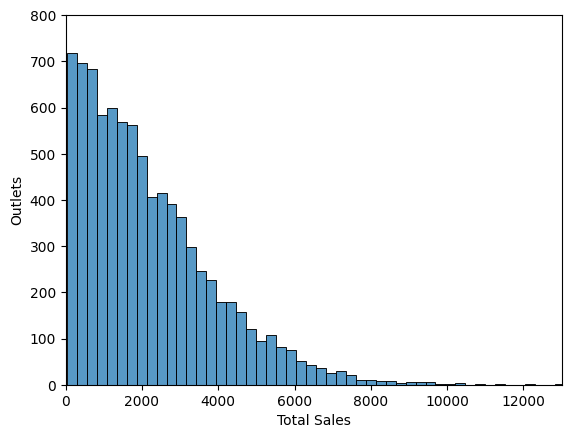

In [25]:
#item outlet sales histogram
item_outlet_sales = df['Item_Outlet_Sales']
sns.histplot(item_outlet_sales, bins=50, kde=False)
plt.xlabel('Total Sales', fontsize=10)
plt.ylabel('Outlets',fontsize=10)
plt.xlim(0, 13000)
plt.ylim(0,800)
#the data exhibits a marked negative skewness, indicating that the majority of outlets have total sales around ± 2000. This skewness suggests that there are relatively few outlets with higher total sales, while a larger number of outlets have sales closer to the average value

<ipython-input-26-545ecf943ab4>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Maximum Retail Price of Items')

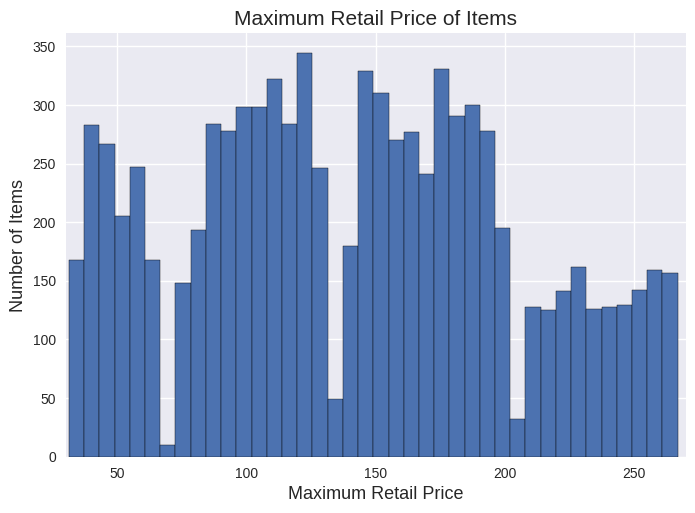

In [26]:
#MRPs histogram
plt.style.use('seaborn')
df['Item_MRP'].hist(bins = 40,edgecolor='black')
plt.xlabel('Maximum Retail Price', fontsize= 13)
plt.xlim(30, 270)
plt.ylabel('Number of Items', fontsize = 13)
plt.title('Maximum Retail Price of Items', fontsize = 15)

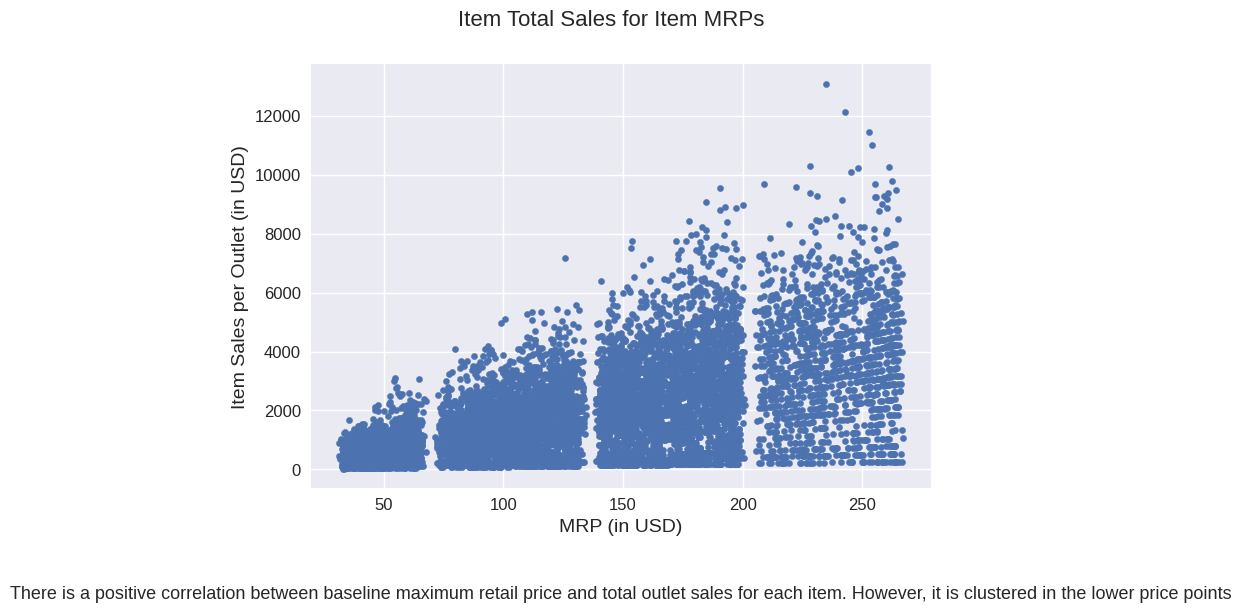

In [27]:
df.plot.scatter(y = 'Item_Outlet_Sales', x = 'Item_MRP')
plt.rcParams["figure.figsize"] = (5,5)
plt.xticks(fontsize =12)
plt.yticks(fontsize=12)
plt.suptitle('Item Total Sales for Item MRPs', fontsize = 16)
plt.title('There is a positive correlation between baseline maximum retail price and total outlet sales for each item. However, it is clustered in the lower price points', fontsize = 13, y=-0.28, loc = 'center')
plt.ylabel('Item Sales per Outlet (in USD)', fontsize = 14)
plt.xlabel('MRP (in USD)', fontsize = 14);

<Axes: >

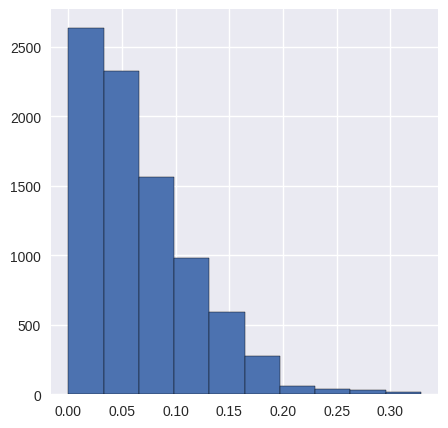

In [28]:
df['Item_Visibility'].hist(bins = 10,edgecolor = 'black')
#more items have lower visibility

<Axes: >

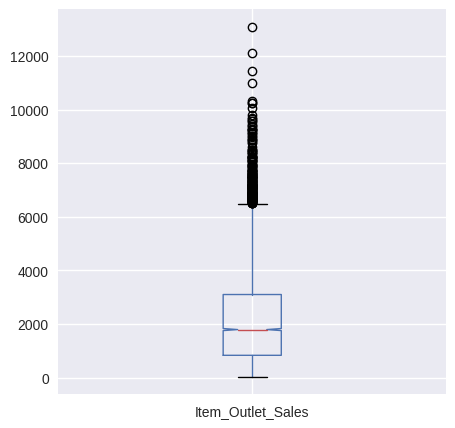

In [29]:
df.boxplot(column = 'Item_Outlet_Sales', notch = True)
#This boxplot confirms what we just saw in the histogram, the data is likely right skewed
#however, outliers may not mean they are not erroneous or relevant, but just that they are far from my mean stat

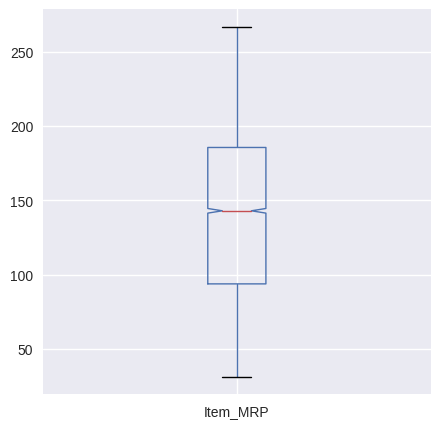

In [30]:
#MRP
df.boxplot(column= 'Item_MRP', notch = True);
#No outliers on the MRP

Text(0, 0.5, ' ')

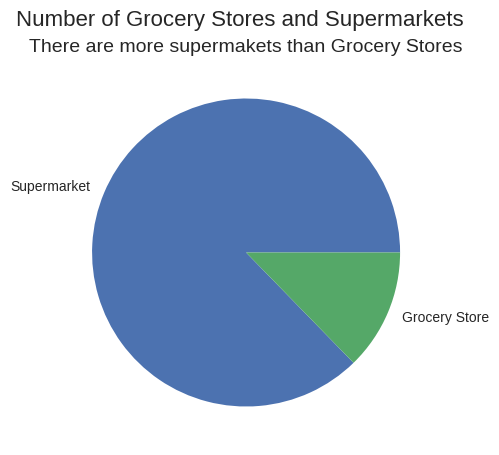

In [40]:
df['Outlet_Type'].value_counts().plot(kind = 'pie')
plt.title('Comparison')
plt.suptitle('Number of Grocery Stores and Supermarkets')
plt.title('There are more supermakets than Grocery Stores', fontsize = 14)
plt.suptitle('Number of Grocery Stores and Supermarkets', fontsize = 16)
plt.ylabel(' ')

In [49]:
grocery_store = df[df['Outlet_Type'] == 'Grocery Store']
grocery_store['Item_Outlet_Sales'].min()

33.29

In [50]:
grocery_store['Item_Outlet_Sales'].max()

1775.6886

<ipython-input-54-d0f4831ce952>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


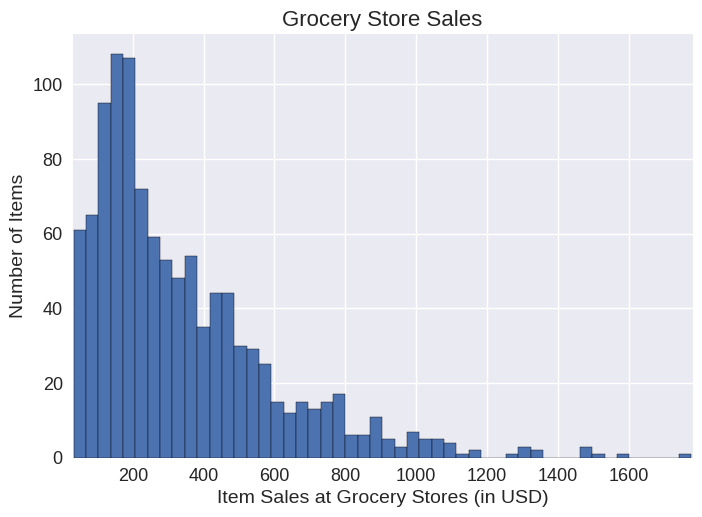

In [54]:
#Just Grocery
plt.style.use('seaborn')
grocery_store['Item_Outlet_Sales'].hist(bins = 50, edgecolor='black')
plt.title('Grocery Store Sales', fontsize = 16)
plt.xlabel('Item Sales at Grocery Stores (in USD)', fontsize = 14)
plt.xlim(30, 1780)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel('Number of Items', fontsize = 14)

In [55]:
supermarket = df[df['Outlet_Type'] == 'Supermarket']
supermarket['Item_Outlet_Sales'].min()

69.2432

In [56]:
supermarket['Item_Outlet_Sales'].max()

13086.9648

<ipython-input-57-ffb8b0fa277f>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


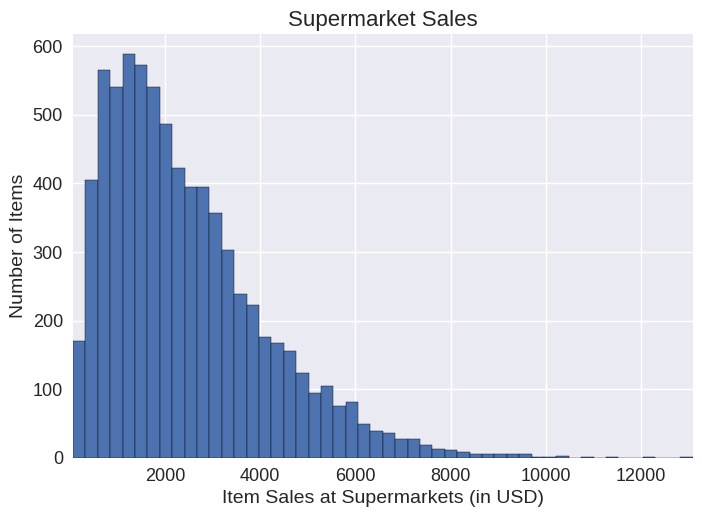

In [57]:
#Just Supermarkets
plt.style.use('seaborn')
supermarket['Item_Outlet_Sales'].hist(bins = 50, edgecolor='black')
plt.xlabel('Item Sales at Supermarkets (in USD)', fontsize = 14)
plt.ylabel('Number of Items', fontsize = 14)
plt.yticks(fontsize =13)
plt.xticks(fontsize = 13)
plt.xlim(60,13087)
plt.title('Supermarket Sales', fontsize = 16);

In [58]:
df['Item_Outlet_Sales'].median()

1794.331

In [59]:
IQR_75 =np.percentile(df['Item_Outlet_Sales'], [75])
IQR_75

array([3101.2964])

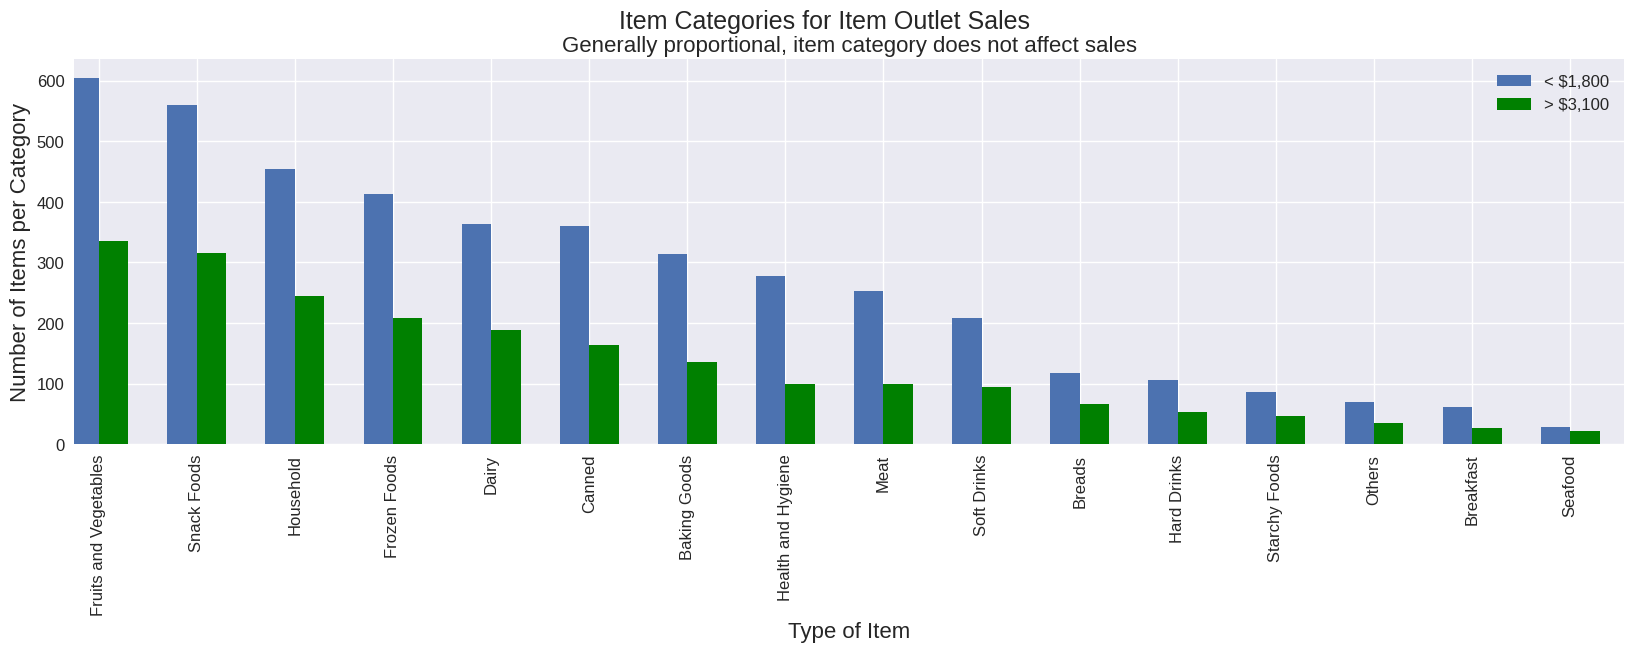

In [75]:
#median is about 1800 for item outlet sales and the 75th percentile is 3100(aprox), let's look at which categories aren't doing as well.
sales_filter = df.loc[:, 'Item_Outlet_Sales'] < 1800
high_sales_filter = df.loc[:, 'Item_Outlet_Sales'] > 3100

df.loc[sales_filter, 'Item_Type'].value_counts().plot(kind ='bar', width=0.3, position=1, label = '< $1,800');
df.loc[high_sales_filter, 'Item_Type'].value_counts().plot(kind ='bar', width=0.3, color = 'green',position =0, label = '> $3,100');
plt.suptitle('Item Categories for Item Outlet Sales', fontsize = 18)
plt.title('Generally proportional, item category does not affect sales', fontsize = 16)
plt.legend(fontsize = 12)
plt.xlabel('Type of Item', fontsize = 16)
plt.ylabel('Number of Items per Category', fontsize = 16);
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rcParams["figure.figsize"] = (20,5);